# How to Perform Object Detection With YOLOv3 in Keras

In this tutorial, we will discover how to develop a YOLOv3 model for object detection on new photographs.

After completing this tutorial, we will know:

* YOLO-based Convolutional Neural Network family of models for object detection and the most recent variation called YOLOv3.
* The best-of-breed open source library implementation of the YOLOv3 for the Keras deep learning library.
* How to use a pre-trained YOLOv3 to perform object localization and detection on new photographs.

## Table of Contents

- [1 - Mount Google Drive](#1)
- [2 - Packages](#2)
- [3 - Create and Save Model](#3)
- [4 - Make a Prediction](#4)
  - [4.1 - Load the yolov3 Model](#4-1)
  - [4.2 - Set some parameters](#4-2)
  - [4.3 - Load and Prepare Image](#4-3)
  - [4.4 - Make a Prediction and Interpret Result](#4-4)
- [5 - Summary](#5)



<a name='1'></a>
## 1 - Mount Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Print the current working directory

In [4]:
!pwd

/content


Access to the directory which we will work on

In [5]:
%cd ./drive/MyDrive/Colab\ Notebooks/CNN/YOLO

/content/drive/MyDrive/Colab Notebooks/CNN/YOLO


In [6]:
!ls

model.h5     sunny_images		yolov3_object_detection.ipynb
__pycache__  yolo3_object_detection.py	yolov3.weights


<a name='2'></a>
## 2 - Packages

Run the following code cell to import the necessary packages and dependencies you will need to perform VGG Network.

In [46]:
from yolo3_object_detection import make_yolov3_model, WeightReader, decode_netout, correct_yolo_boxes, do_nms, draw_boxes, preprocess_input

from tensorflow.keras.models import load_model
import cv2
from matplotlib import pyplot

<a name='3'></a>
## 3 - Create and Save Model

The first step is to download the pre-trained model weights. These were trained using the DarkNet code base on the MSCOCO dataset.

In [6]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2021-09-01 04:30:58--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  41.5MB/s    in 6.3s    

2021-09-01 04:31:04 (37.2 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [7]:
!ls

yolov3_object_detection.ipynb  yolov3.weights


So, yolov3.weights was downloaded successfully.

Next, we need to define a Keras model that has the right number and type of layers to match the downloaded model weights. The model architecture is called a “DarkNet” and was originally loosely based on the VGG-16 model.

In [8]:
# define the model
model = make_yolov3_model()


Next, we need to load the model weights. The model weights are stored in whatever format that was used by DarkNet. Rather than trying to decode the file manually, we can use the WeightReader class provided in the script.

In [9]:
# load the model weights
weight_reader = WeightReader('yolov3.weights')

# set the model weights into the model
weight_reader.load_weights(model)

loading weights of convolution #0
loading weights of convolution #1
loading weights of convolution #2
loading weights of convolution #3
no convolution #4
loading weights of convolution #5
loading weights of convolution #6
loading weights of convolution #7
no convolution #8
loading weights of convolution #9
loading weights of convolution #10
no convolution #11
loading weights of convolution #12
loading weights of convolution #13
loading weights of convolution #14
no convolution #15
loading weights of convolution #16
loading weights of convolution #17
no convolution #18
loading weights of convolution #19
loading weights of convolution #20
no convolution #21
loading weights of convolution #22
loading weights of convolution #23
no convolution #24
loading weights of convolution #25
loading weights of convolution #26
no convolution #27
loading weights of convolution #28
loading weights of convolution #29
no convolution #30
loading weights of convolution #31
loading weights of convolution #32

That’s it; we now have a YOLOv3 model for use. We can save this model to a Keras compatible .h5 model file ready for later use.

In [10]:
# save the model to file
model.save('model.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [20]:
!ls

model.h5     yolo3_object_detection.py	    yolov3.weights
__pycache__  yolov3_object_detection.ipynb


<a name='4'></a>
## 4 - Make a Prediction

<a name='4-1'></a>
### 4.1 - Load the yolov3 Model

In [11]:
# load yolov3 model
model = load_model('model.h5')

<a name='4-2'></a>
### 4.2 - Set some parameters

In [37]:
net_h, net_w = 416, 416
obj_thresh, nms_thresh = 0.6, 0.5
anchors = [[116,90,  156,198,  373,326],  [30,61, 62,45,  59,119], [10,13,  16,30,  33,23]]
labels = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", \
          "boat", "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", \
          "bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", \
          "backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", \
          "sports ball", "kite", "baseball bat", "baseball glove", "skateboard", "surfboard", \
          "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana", \
          "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", \
          "chair", "sofa", "pottedplant", "bed", "diningtable", "toilet", "tvmonitor", "laptop", "mouse", \
          "remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator", \
          "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"]

<a name='4-3'></a>
### 4.3 - Load and Prepare Image

First, we need to load the image and resize it to the required size of 416x416 pixels.

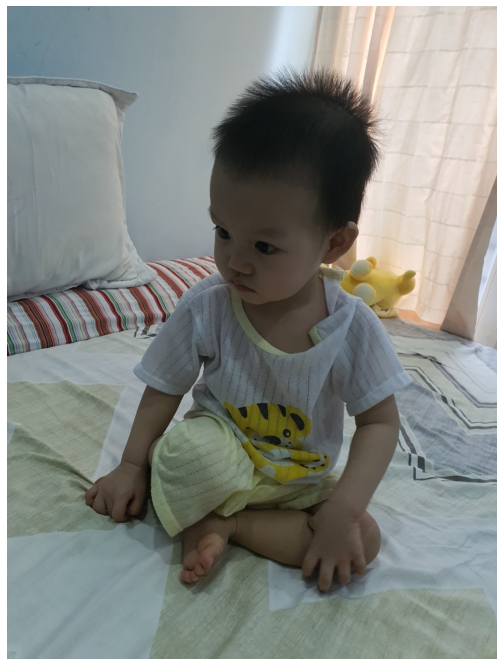

In [47]:
# load the image with the required size
image_path = './sunny_images/sunny_1.jpg'
image = cv2.imread(image_path)

pyplot.figure(figsize=(12,12))
pyplot.axis("off")
pyplot.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [48]:
image_h, image_w, _ = image.shape
new_image = preprocess_input(image, net_h, net_w)

<a name='4-4'></a>
### 4.4 - Make a Prediction and Interpret Result

In [49]:
# make prediction
yolos = model.predict(new_image)

In [50]:
boxes = []

for i in range(len(yolos)):
    # decode the output of the network
    boxes += decode_netout(yolos[i][0], anchors[i], obj_thresh, nms_thresh, net_h, net_w)

In [42]:
# correct the sizes of the bounding boxes
correct_yolo_boxes(boxes, image_h, image_w, net_h, net_w)

In [43]:
# suppress non-maximal boxes
do_nms(boxes, nms_thresh)

In [44]:
# draw bounding boxes on the image using labels
draw_boxes(image, boxes, labels, obj_thresh) 

bed: 93.61066818237305%
person: 99.25597906112671%
bed: 99.70864653587341%


array([[[139, 126, 104],
        [138, 125, 103],
        [139, 126, 104],
        ...,
        [184, 194, 201],
        [180, 190, 197],
        [177, 187, 194]],

       [[142, 129, 107],
        [141, 128, 106],
        [142, 129, 107],
        ...,
        [177, 187, 194],
        [176, 186, 193],
        [175, 185, 192]],

       [[142, 130, 106],
        [141, 129, 105],
        [141, 129, 105],
        ...,
        [173, 182, 191],
        [174, 183, 192],
        [175, 184, 193]],

       ...,

       [[157, 157, 139],
        [158, 158, 140],
        [160, 158, 140],
        ...,
        [124, 140, 139],
        [127, 143, 142],
        [131, 147, 146]],

       [[162, 160, 142],
        [161, 159, 141],
        [160, 158, 140],
        ...,
        [126, 142, 141],
        [127, 142, 144],
        [129, 144, 146]],

       [[164, 162, 144],
        [162, 160, 142],
        [159, 157, 139],
        ...,
        [128, 144, 143],
        [127, 142, 144],
        [127, 142, 144]]

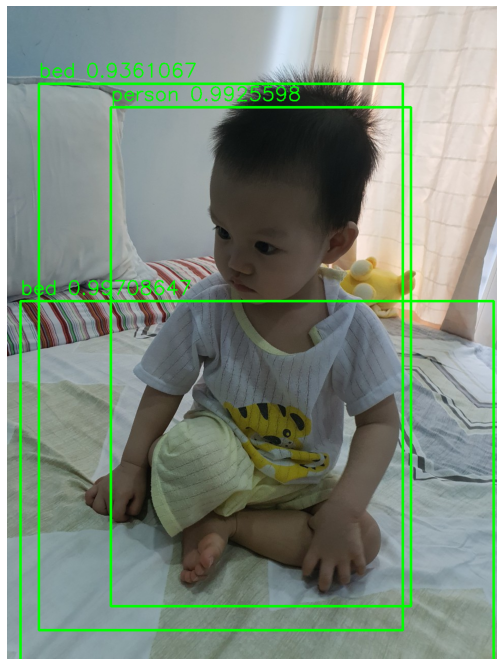

In [45]:
pyplot.figure(figsize=(12,12))
pyplot.axis("off")
pyplot.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

<a name='5'></a>
## 5 - Summary

In this tutorial, we discovered how to develop a YOLOv3 model for object detection on new photographs.

Specifically, we learned:

* YOLO-based Convolutional Neural Network family of models for object detection and the most recent variation called YOLOv3.
* How to use a pre-trained YOLOv3 to perform object localization and detection on new photographs.